In [9]:
import scipy.spatial.distance as spd
import pickle
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import pinv

from sklearn.metrics import confusion_matrix

lab2path = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab2/Material fornecido/'

### Métricas de Distâncias

Para ser uma métrica de distância precisa de cumprir quatro propriedades: 
- Não negatividade: $D(x, y) \geq 0$
- Identificade: $D(x, y) = 0$ , se e só se $x = y$
- Simetria: $D(x, y) = D(y, x)$
- Desigualdade Triangular: $S(x, y) \leq D(x, z) + D(z, y)$



#### Distancia Euclideana (norma L2):
- Comprimento do troço da reta que une os pontos x e y. </br>
$D(x, y) = || x - y || = (\sum_{k=1}^{d} (x_k - y_k)^2)^\frac{1}{2}$
 

#### Distancia Manhattan (City-Block ou norma L1):
- Diferença entre cada coordenada, tirar o seu valor absoluto e soma-los a todos
- Não se pode andar na diagonal, apenas em linhas perpendiculares </br>
$D(x, y) = | x - y | = \sum_{k = 1}^{d} | x_k - y_k|$

#### Distancia de cosseno:
- Depende do angulo entre o referêncial e os dois pontos. 
- Pode ser visto como o produto interno entre x e y, a dividir pelas suas normas (agarrar em cada uma das coordenadas, eleva-las ao quadrado, soma-las todas e tirar a raiz quadrada). </br>
$D(x, y) = 1 - \frac{x^T y}{||x||*||y||}$


### MNIST

Conjunto de dígitos manustritos com cerca de 70000 digitos. 
Ficheiro MNISTsmall.p (pickle) contém um subconjunto com 15000 digitos. 

Para calcular as matrizes de distância não podemos usar todo o conjunto do MNISTsmall, pois teriamos matrizes de 15000x15000. Assim vamos selecionar os primeiros 200 exemplos de cada classe. Como temos 10 classes, ficamos com um subconjunto de 2000 exemplos. 

In [10]:
fName = lab2path + 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

# Chaves do dicionário
print(D.keys())

# Dados
X = D['X']
print("Tipo original dos dados: ", X.dtype) 
X = X*1.0   # Dados vêm de imagens em formato uint8. Precisamos
            # de fazer o cast dos dados para float
print("Tipo convertido dos dados: ", X.dtype) 


# Classes verdadeiras
y = D['trueClass']
print(X.shape) # Cada dado tem 784 dimensões e há 15000 exemplos

print("Classes em y: ", np.unique(y))

# Podemos verificar se os dados vêm ordenados ou baralhados fazendo o plot das classes
#plt.plot(y)

# Como estamos a tratar imagens, podemos ir buscar uma das amostras e apresentá-la
#x = X[:, 7777]
#plt.imshow(x.reshape((28,28)), cmap='binary')


# Vamos buscar os primeiros 200 exemplos de cada classe
Xb = X[:, y==0][:,:200]
#print(Xb.shape)

for i in range(1, 10): 
    Xtemp = X[:, y==i][:,:200]
    Xb = np.hstack((Xb,Xtemp))

print(Xb.shape)

D2 = spd.squareform(spd.pdist(Xb.T, 'euclidean'))
D1 = spd.squareform(spd.pdist(Xb.T, 'cityblock'))
Dc = spd.squareform(spd.pdist(Xb.T, 'cosine'))





dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
Tipo original dos dados:  uint8
Tipo convertido dos dados:  float64
(784, 15000)
Classes em y:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(784, 2000)


(-0.5, 1999.5, 1999.5, -0.5)

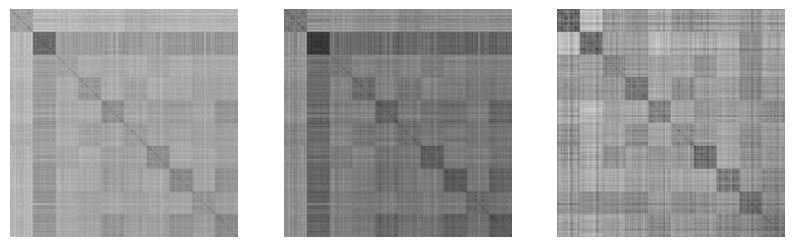

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(131) # Nro linhas, Nro colunas, Nro do plot
plt.imshow(D2, cmap='gray')
plt.axis('off')

plt.subplot(132) 
plt.imshow(D1, cmap='gray')
plt.axis('off')

plt.subplot(133) 
plt.imshow(Dc, cmap='gray')
plt.axis('off')


(2, 2000)
(2000,)


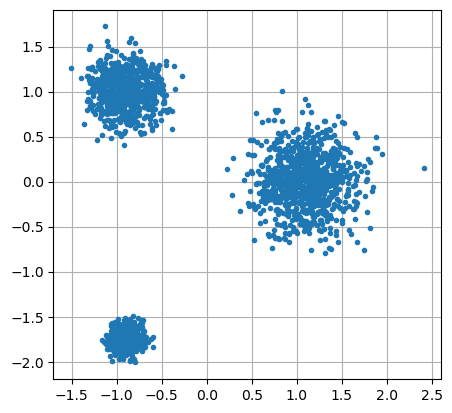

In [12]:
# LAB2distancias001.p
fName = lab2path + 'LAB2distancias001.p'
D = pickle.load(open(fName, 'rb'))

D.keys()

X = D['X']
y = D['idxClass']
print(X.shape)
print(y.shape)

# Ver os dados
plt.plot(X[0,:], X[1,:], '.')
plt.axis('scaled')
plt.grid(True)


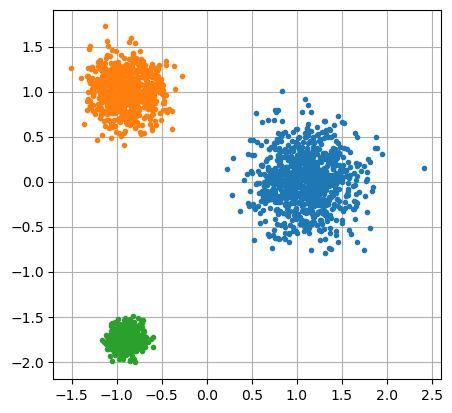

In [13]:
# Ver os dados com separação das classes por cores
plt.plot(X[0,y==1], X[1,y==1], '.')
plt.plot(X[0,y==2], X[1,y==2], '.')
plt.plot(X[0,y==3], X[1,y==3], '.')
plt.axis('scaled')
plt.grid(True)

Shape antes do squareform:  (1999000,)
Shape depois do squareform:  (2000, 2000)


(-0.5, 1999.5, 1999.5, -0.5)

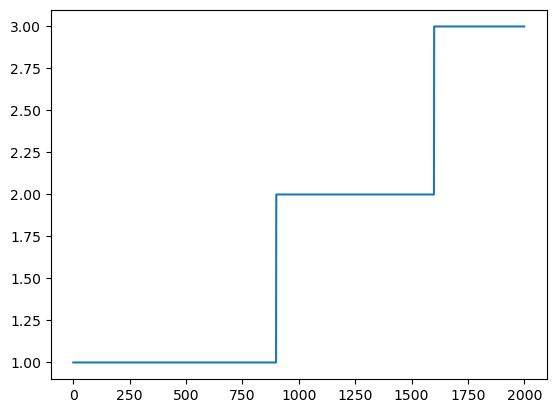

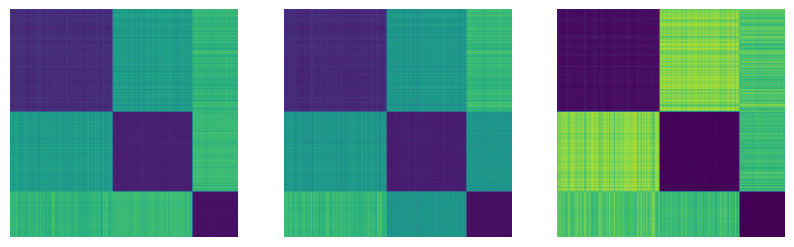

In [14]:
# Ver quantas classes tenho
np.unique(y)

# Ver se classes estão ordenadas
plt.plot(y)

# Para calcular com pdist tenho que transpor matriz do dados
# Não devolve matriz quadrada para minimizar o espaço ocupado
# Por isso, temos que depois converter os resultados para uma 
# matriz (squareform)
D2 = spd.pdist(X.T, 'euclidean')
print("Shape antes do squareform: ", D2.shape)
D2 = spd.squareform(D2)
print("Shape depois do squareform: ", D2.shape)

# Repito o mesmo processo para as restantes distâncias
D1 = spd.squareform(spd.pdist(X.T, 'cityblock'))
Dc = spd.squareform(spd.pdist(X.T, 'cosine'))

# Agora já a consigo visualizar todas as distâncias 
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(D2)
plt.axis('off')
plt.subplot(132)
plt.imshow(D1)
plt.axis('off')
plt.subplot(133)
plt.imshow(Dc)
plt.axis('off')


Text(0.5, 1.0, 'Distancia Cosseno - Calc. Manualmente')

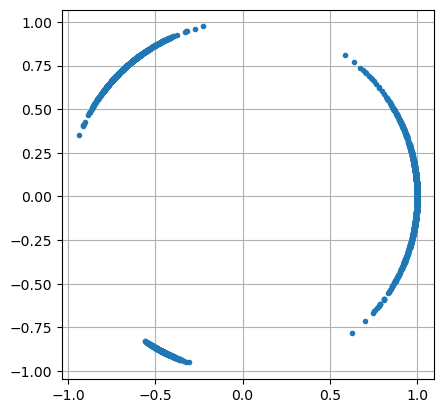

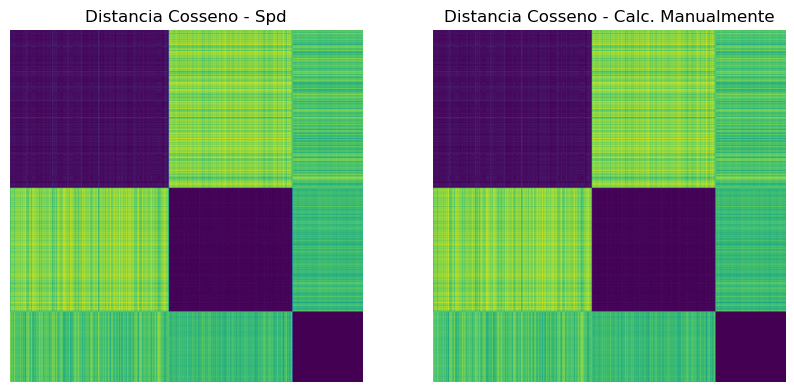

In [15]:
# norma de X
nx = np.sqrt(np.sum(X**2, axis=0))
Xn = X/nx
plt.plot(Xn[0,:], Xn[1, :], '.')
plt.axis('scaled')
plt.grid(True)

Dc2 = 1-np.dot(Xn.T, Xn)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(Dc)
plt.axis('off')
plt.title('Distancia Cosseno - Spd')
plt.subplot(122)
plt.imshow(Dc2)
plt.axis('off')
plt.title('Distancia Cosseno - Calc. Manualmente')


In [16]:
print(Dc[:3, :3])
print(Dc2[:3, :3])

[[0.         0.02685195 0.05020918]
 [0.02685195 0.         0.00369288]
 [0.05020918 0.00369288 0.        ]]
[[-2.22044605e-16  2.68519488e-02  5.02091775e-02]
 [ 2.68519488e-02  1.11022302e-16  3.69288067e-03]
 [ 5.02091775e-02  3.69288067e-03  0.00000000e+00]]


### Classificadores baseados em Distâncias



(2, 3000)
(3000,)
[1. 2. 3.]


(-6.162766768248915, 5.460849510937149, -3.7936429671957037, 4.073949557949851)

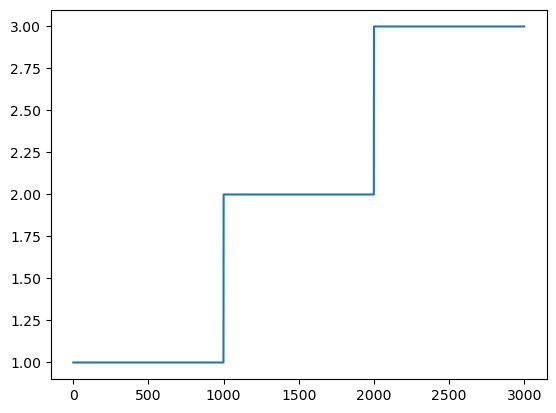

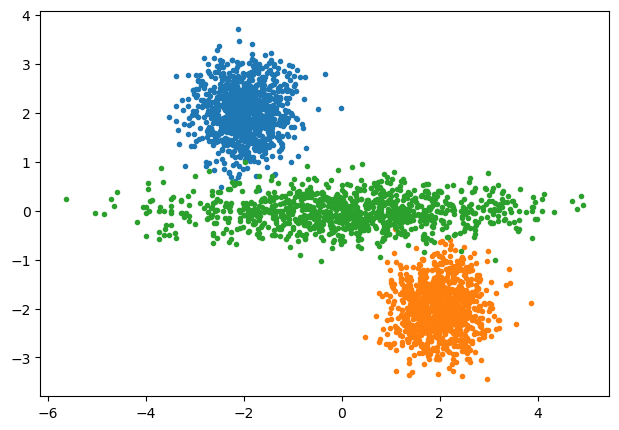

In [17]:
fName = lab2path + 'LAB2distancias002.p'
D = pickle.load(open(fName, 'rb'))

D.keys()
X = D['X']
y = D['idxClass']

print(X.shape) # Tamanho do X
print(y.shape) # Tamanho do y
print(np.unique(y)) # Quais as classes disponíveis?

plt.plot(y) # As classes estão ordenadas? 
plt.figure(figsize=(10,5))
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.axis('scaled')






In [18]:
m1 = np.mean(X[:, y==1], axis=1) # Média da Classe 1
m2 = np.mean(X[:, y==2], axis=1) # Média da Classe 2
m3 = np.mean(X[:, y==3], axis=1) # Média da Classe 3

D1 = np.sqrt(np.sum((X-m1[:, np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X-m2[:, np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X-m3[:, np.newaxis])**2, axis=0))

# Empilho verticalmente todas as distancias
D = np.vstack((D1, D2, D3))
ye = np.argmin(D, axis=0)

#ye terá valores de 0 a 2, e não de 1 a 3. Por isso somo +1 para ficar 
# logo com o valor da classe, em vez do valor do indice
ye = ye + 1

te = np.sum(y!=ye)/3000 # Calculo da taxa de erros
ta = 1 - te # Calculo da taxa de erros

print("Taxe de Erros: ", te, " \nTaxa de Acertos: ", ta)


MC = confusion_matrix(y, ye)
print ("Matriz de confusão:\n", MC) # Matriz de confusão


Taxe de Erros:  0.08666666666666667  
Taxa de Acertos:  0.9133333333333333
Matriz de confusão:
 [[1000    0    0]
 [   0  997    3]
 [ 122  135  743]]


(-6.162766768248915, 5.460849510937149, -3.7936429671957037, 4.073949557949851)

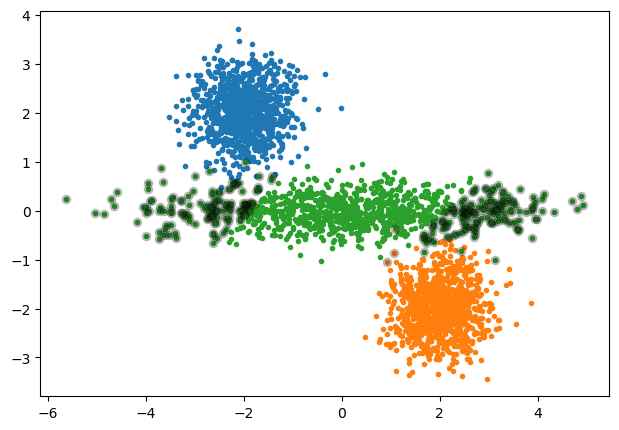

In [19]:
# Ver pontos errados na classificação (pretos)
# Isto acontece porque esses pontos estão mais próximos de 
# outra classe do que da própria classe
plt.figure(figsize=(10,5))
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.2)
plt.axis('scaled')

#### Distancia de Mahalanobis

$Fórmula$

[[992   0   8]
 [  0 991   9]
 [  2   3 995]]
Nro total erros:  22


(-6.162766768248915, 5.460849510937149, -3.7936429671957037, 4.073949557949851)

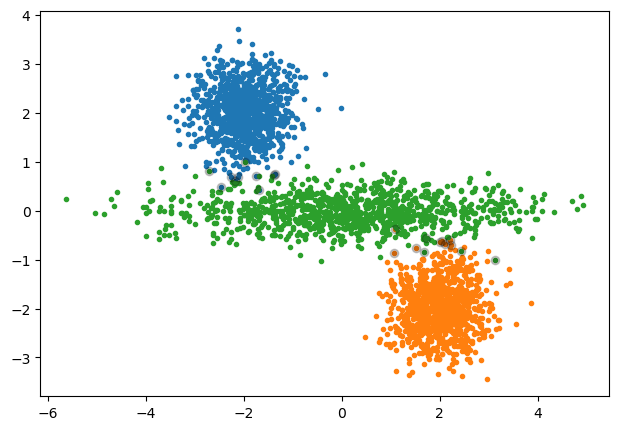

In [20]:
m1 = np.array([-2, 2])
m2 = np.array([2, -2])
m3 = np.array([0, 0])

S1 = np.eye(2)*1/4
S2 = np.array([[1/4, 0], [0, 1/4]])
S3 = np.array([[3, 0], [0, 1/10]])

S1i = pinv(S1)
S2i = pinv(S2)
S3i = pinv(S3)

D1 =  np.sqrt(np.sum((X-m1[:, np.newaxis])*np.dot(S1i, (X-m1[:, np.newaxis])), axis=0))
D2 =  np.sqrt(np.sum((X-m2[:, np.newaxis])*np.dot(S2i, (X-m2[:, np.newaxis])), axis=0))
D3 =  np.sqrt(np.sum((X-m3[:, np.newaxis])*np.dot(S3i, (X-m3[:, np.newaxis])), axis=0))

D = np.vstack((D1, D2, D3))

ye = np.argmin(D, axis=0)+1

MC = confusion_matrix(y, ye)
print(MC)
print("Nro total erros: ",  np.sum(y!=ye))

plt.figure(figsize=(10,5))
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.2)
plt.axis('scaled')


#### Classificador de distância ao Centroid com Dados Reais 

#### Iris Dataset

Chaves do Iris Dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape do array de dados:  (4, 150)
Shape do array de classes verdadeiras:  (150,)
Classes:  [0 1 2]

Matriz de Confusão:
 [[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]
Número de erros:  11
Probabilidade de Erro do Classificador:  7.33 %


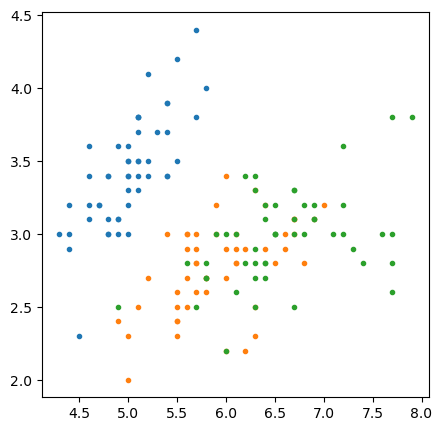

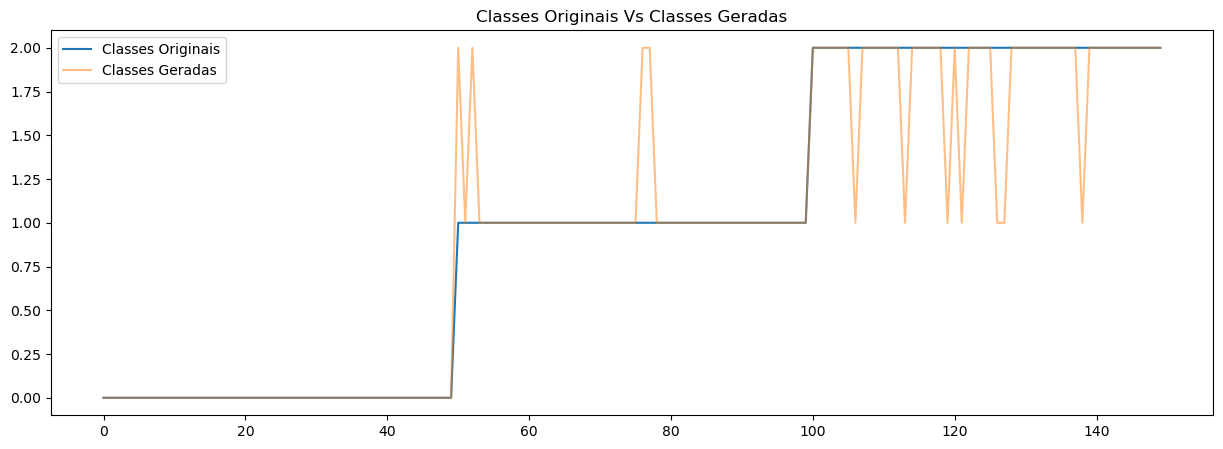

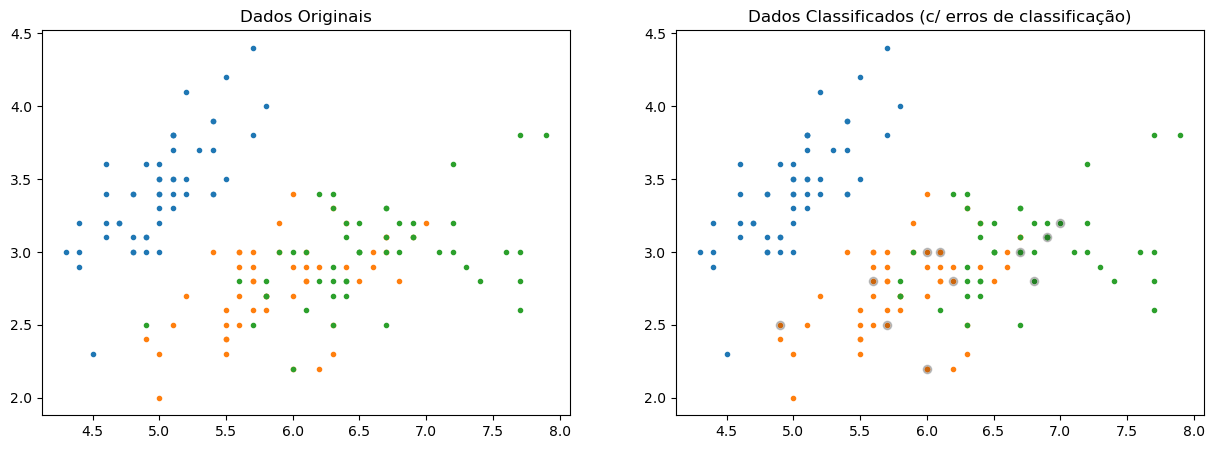

In [21]:
from matplotlib.pyplot import axis, yscale
from sklearn import datasets

Iris = datasets.load_iris()

print("Chaves do Iris Dataset:\n", Iris.keys())

X = Iris['data'].T
y = Iris['target']

print("Shape do array de dados: ", X.shape)
print("Shape do array de classes verdadeiras: ", y.shape)

# Verificar quais as classes que temos
print("Classes: ", np.unique(y))

# Visualizar todas as classes nas primeiras 2 dimensões
# Como os dados estão ordenados pela classe, verificamos o gráfico produzido abaixo
plt.figure(figsize=(5, 5))
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')

# Média para cada classe
m0 = np.mean(X[:, y==0], axis=1)
m1 = np.mean(X[:, y==1], axis=1)
m2 = np.mean(X[:, y==2], axis=1)

# Calculas as distâncias à média de cada classe 
D0 = np.sqrt(np.sum((X - m0[:, np.newaxis])**2, axis=0))
D1 = np.sqrt(np.sum((X - m1[:, np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X - m2[:, np.newaxis])**2, axis=0))

# Junto todas as distâncias numa matriz
D = np.vstack((D0, D1, D2))

# Obtenho o indice da linha(classe) que minimiza a distância a cada uma das classes
ye = np.argmin(D, axis=0)

print("\nMatriz de Confusão:\n", confusion_matrix(y, ye))
print("Número de erros: ", np.sum(y!=ye))
print("Probabilidade de Erro do Classificador: ", np.round(np.sum(y!=ye)/np.sum(y)*100, 2), "%")

# Visualização das Classes Originais e das Classes Geradas/Classificadas
plt.figure(figsize=(15, 5))
plt.title("Classes Originais Vs Classes Geradas")
plt.plot(y)
plt.plot(ye, alpha=0.5)
plt.legend(["Classes Originais", "Classes Geradas"])


# Visualização dos Dados Originais e dos Dados Classificadas
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Dados Originais")
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')

plt.subplot(122)
plt.title("Dados Classificados (c/ erros de classificação)")
plt.plot(X[0, ye==0], X[1, ye==0], '.')
plt.plot(X[0, ye==1], X[1, ye==1], '.')
plt.plot(X[0, ye==2], X[1, ye==2], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.2)






#### Classificador da Distância ao Centroid com MNIST Dataset 


In [22]:
fN = lab2path + 'MNISTsmall.p'
D = pickle.load(open(fN, 'rb'))
